# Triangulacja wielokąta prostego -- porównanie metod
## Notebook Jupyter z przykładami użycia funkcji
### Autorzy
Jakub Pisarek, Szymon Bednorz

In [63]:
# Ustawienia wstępne, import modułów
from time import perf_counter

import geometria
import triangulate

%matplotlib widget

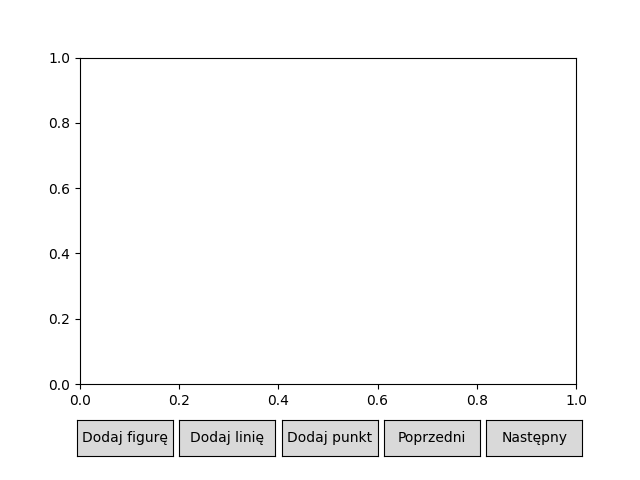

In [105]:
# Miejsce na rysowanie nowych wielokątów
p = geometria.BetterPlot().set_limits((-10, 10)).get_plot()
p.draw()

In [15]:
# odczyt z narzędzia
def get_drawn_polygons(p):
    rv = []
    for fig in p.get_added_figure():
        truefig = [fig.lines[0][0]]
        for _, p2 in fig.lines[:-1]:
            truefig.append(p2)
        rv.append(truefig)
    return rv

In [86]:
# setup testowych wielokątów
test_polys=[[(-5.411290322580646, -9.18014705882353), (-1.862903225806452, -4.259803921568627), (1.064516129032258, -9.854166666666668), (4.524193548387098, -3.3161764705882355), (0.754032258064516, -5.1360294117647065), (2.971774193548386, 7.063725490196081), (-2.306451612903226, 10.164215686274513), (-4.080645161290322, 7.333333333333336), (-7.008064516129032, 10.433823529411768), (-9.536290322580644, 5.917892156862745), (-6.69758064516129, 1.4693627450980387), (-4.346774193548386, 3.6936274509803937), (-6.209677419354838, 4.772058823529413), (-2.483870967741936, 6.254901960784316), (-1.685483870967742, 1.536764705882355), (-5.056451612903226, -2.574754901960784), (-8.693548387096774, -0.013480392156861143), (-9.491935483870968, -6.349264705882353)], [(-0.9758064516129021, 9.22058823529412), (-1.02016129032258, 2.480392156862745), (-2.39516129032258, -0.21568627450980316), (-5.056451612903226, -2.6421568627450984), (-2.528225806451612, -4.731617647058824), (-5.455645161290322, -8.506127450980392), (3.2379032258064537, -10.05637254901961), (0.7096774193548399, 7.670343137254903)], [(1.02016129032258, 7.131127450980394), (-3.459677419354838, -9.314950980392158), (5.100806451612904, -6.7536764705882355), (2.39516129032258, -3.450980392156863), (4.96774193548387, -0.9571078431372548), (2.306451612903226, 1.334558823529413), (1.153225806451612, 4.098039215686274), (1.19758064516129, 10.096813725490197)], [(-1.55241935483871, 9.355392156862749), (-8.782258064516128, -4.125), (-5.278225806451612, -0.8223039215686256), (-3.814516129032258, 3.019607843137255), (-2.883064516129032, 3.087009803921571), (-5.233870967741936, -2.9117647058823533), (-4.30241935483871, -4.192401960784313), (-2.39516129032258, 3.8284313725490193), (-1.064516129032258, 0.0649509803921582), (0.931451612903226, -2.776960784313726)], [(-5.810483870967742, -5.58578431372549), (1.5967741935483861, -3.5183823529411757), (2.794354838709678, -7.36029411764706), (2.92741935483871, -4.394607843137255), (0.6653225806451601, -1.5637254901960773), (4.125, -1.2941176470588225), (6.298387096774194, -6.147058823529411), (4.657258064516128, -0.21568627450980316), (9.758064516129032, -8.10171568627451), (1.685483870967742, 8.479166666666668)], [(-2.040322580645162, 6.861519607843139), (-2.040322580645162, 4.974264705882355), (-2.616935483870968, 3.7610294117647065), (-3.681451612903226, 2.3455882352941195), (-4.923387096774194, 1.334558823529413), (-6.298387096774194, 0.39093137254901933), (-7.806451612903226, -0.08088235294117396), (4.701612903225806, -2.979166666666666)], [(0.13306451612903203, 10.029411764705884), (-2.705645161290322, 10.096813725490197), (-5.5, 9.018382352941178), (-7.096774193548387, 7.737745098039216), (-8.826612903225808, 5.715686274509807), (-9.625, 3.424019607843139), (-9.846774193548388, 0.6605392156862742), (-9.625, -2.305147058823529), (-9.137096774193548, -4.596813725490197), (-8.116935483870968, -6.82107843137255), (-6.741935483870968, -8.775735294117647), (-5.233870967741936, -9.517156862745098), (-3.193548387096774, -10.05637254901961), (-0.13306451612903203, -9.988970588235295), (2.705645161290322, -9.382352941176471), (4.96774193548387, -7.899509803921569), (6.653225806451614, -5.068627450980392), (7.274193548387098, -1.6985294117647047), (6.830645161290322, 2.0759803921568647), (5.987903225806454, 4.772058823529413), (4.125000000000002, 7.939950980392158), (2.350806451612902, 9.287990196078432)]]

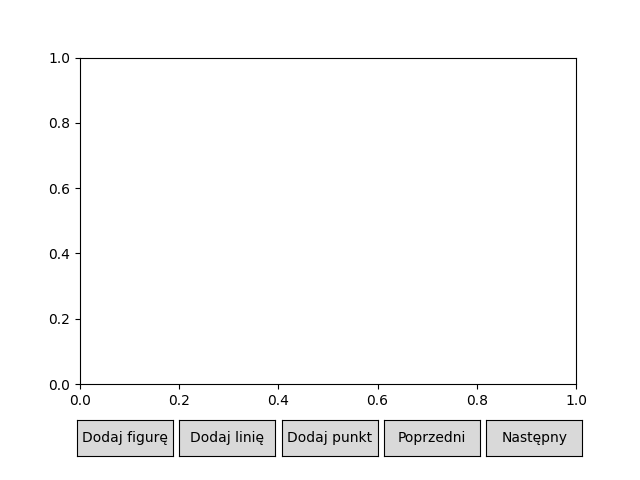

In [97]:
# WIZUALIZACJA ALGORYTMÓW
# ustaw parametry funkcji
POLYIND=6       # indeks wielokąta testowego
c = False       # sklasyfikuj wierzchołki
t = 'partition' # metoda triangulacji
s = True       # pokaż kroki działania algorytmu
eps = 10**(-12) # tolerancja dla zera

p = triangulate.plot_polygon(test_polys[POLYIND], c, t, s, eps)
p.draw()

In [77]:
# Testowanie czasu działania funkcji
POLYIND=0
t_s = perf_counter()
triangulate.triangulate_delaunay(test_polys[POLYIND])
t_e = perf_counter()
print(t_e-t_s)

t_s = perf_counter()
triangulate.triangulate_partition(test_polys[POLYIND])
t_e = perf_counter()
print(t_e-t_s)

0.02885284200010574
[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]]
0.0006033330000718706
